In [1]:
pip install --upgrade imutils

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

SyntaxError: invalid syntax (<ipython-input-4-1bb162140b62>, line 1)

In [13]:
pip install squidpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
# import the necessary packages
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import squidpy as sq

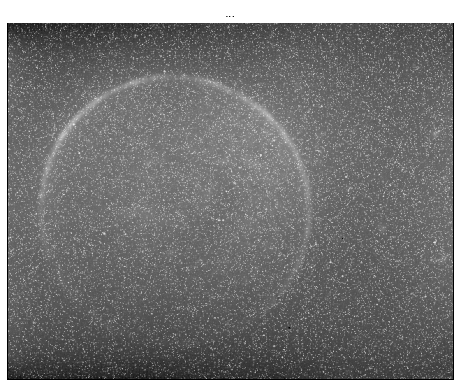

In [13]:
# Set image path
path = "C:\\Users\\Kyoju\\Dropbox\\Python\\"
fileName = "example2.tif"

# Read Input image
inputImage = cv2.imread(path+fileName, cv2.IMREAD_UNCHANGED)

if inputImage is None:
    print("fail to load the image file")
else:
    plt.figure(figsize=(8,8))
    plt.imshow(inputImage, cmap='gray', vmin=5000, vmax=16000)
    
    plt.title("...")
    plt.axis('off')
    plt.show()

# Convert BGR to grayscale:
# grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)


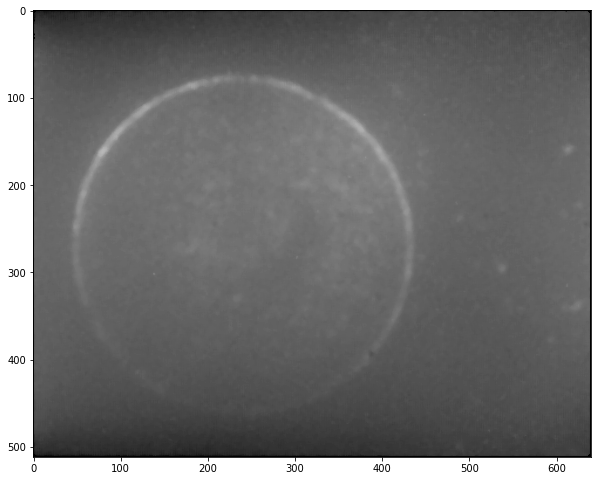

In [3]:
# 미디언 필터 적용
median_filtered = cv2.medianBlur(inputImage, ksize=5)

plt.figure(figsize=(10,10))
plt.imshow(median_filtered, cmap='gray', vmin=5000, vmax=16000)

# 결과 저장
#cv2.imwrite('median_filtered_image.tif', median_filtered)

In [11]:
sq.im.segment(img=median_filtered, method="watershed")

AttributeError: 'numpy.ndarray' object has no attribute '_get_layer'

In [6]:
median_filtered.show("image", channelwise=True)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [53]:
def detect_circles(image_path, threshold):
    # 이미지 읽기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이진화
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 데이터 타입 변환
    binary = np.uint8(binary)
    binary = cv2.bitwise_not(binary)

    # 가장자리 검출
    edges = cv2.Canny(binary, 50, 150)

    # 허프 변환을 사용하여 원 검출
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=70, maxRadius=170)

    # 검출된 원 그리기
    if circles is not None:
        circles = np.round(circles[0, :]).astype(int)
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)
            cv2.circle(image, (x, y), 2, (0, 0, 255), 3)
            print(f"Center: ({x}, {y}), Radius: {r}")

    # 결과 출력
    cv2.imshow('Detected Circles', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [97]:
def detect_arc(image_path, threshold, min_radius, max_radius):
    # 이미지 읽기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이진화
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 데이터 타입 변환
    binary = np.uint8(binary)
    binary = cv2.bitwise_not(binary)
        # 컨투어 검출
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 호 검출
    detected_arcs = []
    for contour in contours:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # 호의 반지름이 최소값과 최대값 사이에 있는 경우에만 처리
        if min_radius <= radius <= max_radius:
            detected_arcs.append((center, radius))
            cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)

    # 결과 출력
    for arc in detected_arcs:
        center, radius = arc
        print(f"Center: {center}, Radius: {radius}")

    cv2.imshow('Detected Arcs', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
min_radius = 10
max_radius = 300
detect_arc(image_path, threshold, min_radius, max_radius)

Center: (88, 155), Radius: 36
Center: (378, 146), Radius: 43
Center: (124, 114), Radius: 13


In [59]:
#image_path = path+fileName
#threshold = 9000;
detect_circles(image_path, threshold)

Center: (318, 490), Radius: 1, Arc Angle: 57.30 degrees
Center: (589, 465), Radius: 1, Arc Angle: 57.30 degrees
Center: (150, 399), Radius: 1, Arc Angle: 57.30 degrees
Center: (98, 396), Radius: 1, Arc Angle: 57.30 degrees
Center: (531, 395), Radius: 1, Arc Angle: 57.30 degrees
Center: (27, 396), Radius: 1, Arc Angle: 57.30 degrees
Center: (18, 393), Radius: 1, Arc Angle: 57.30 degrees
Center: (526, 363), Radius: 1, Arc Angle: 57.30 degrees
Center: (416, 363), Radius: 1, Arc Angle: 114.59 degrees
Center: (73, 357), Radius: 1, Arc Angle: 114.59 degrees
Center: (463, 344), Radius: 2, Arc Angle: 71.62 degrees
Center: (198, 339), Radius: 1, Arc Angle: 57.30 degrees
Center: (592, 335), Radius: 1, Arc Angle: 57.30 degrees
Center: (144, 332), Radius: 1, Arc Angle: 57.30 degrees
Center: (194, 327), Radius: 1, Arc Angle: 57.30 degrees
Center: (551, 323), Radius: 1, Arc Angle: 57.30 degrees
Center: (492, 323), Radius: 1, Arc Angle: 57.30 degrees
Center: (434, 321), Radius: 1, Arc Angle: 57.30 de

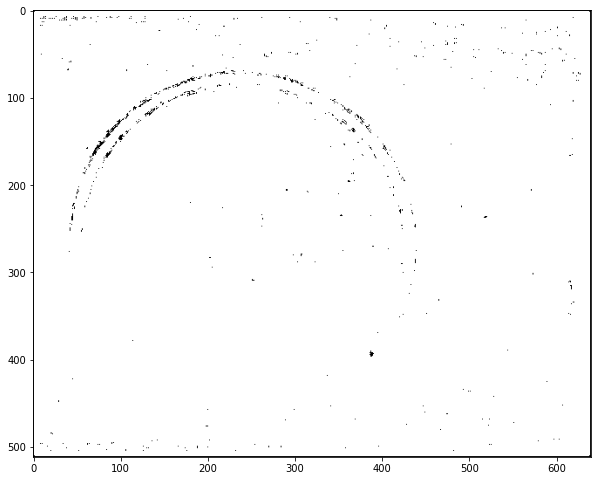

In [49]:
threshold = 9000;
image_path = path+fileName

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지 타입 확인 및 변환
if image.dtype != np.uint8:
    image = image.astype(np.uint8)

median_filtered = cv2.medianBlur(image, ksize=3)

#gray = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2GRAY)

# Adaptive Threshold를 사용한 이진화
binary = cv2.adaptiveThreshold(median_filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2. THRESH_BINARY_INV, 13, 2)


# 데이터 타입 변환
#binary = np.uint8(binary)
#binary = cv2.bitwise_not(binary)

#with np.printoptions(threshold=np.inf):
#    print(binary)
plt.figure(figsize=(10,10))
plt.imshow(binary, cmap='gray', vmin=0, vmax=255)

In [31]:
print(binary)

[[  0   0   0 ...   0   0   0]
 [  0   0 255 ... 255   0   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0   0 255 ... 255   0   0]
 [  0   0   0 ...   0   0   0]]


11538.0


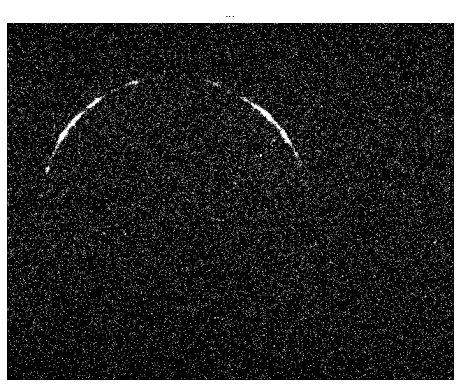

In [96]:
# Threshold via Otsu + bias adjustment:
threshValue, binaryImage = cv2.threshold(inputImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#binaryImage = cv2.bitwise_not(binaryImage)
binaryImage_reverse = 255-binaryImage

print(threshValue)

plt.figure(figsize=(8,8))
plt.imshow(binaryImage_reverse, cmap='gray', vmin=0, vmax=255)
    
plt.title("...")
plt.axis('off')
plt.show()

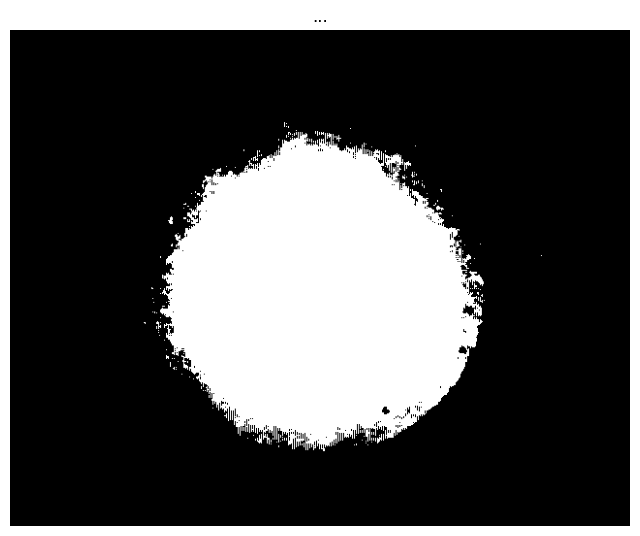

In [31]:
binaryImage_reverse = 255-binaryImage

plt.figure(figsize=(8,8))
plt.imshow(binaryImage_reverse, cmap='gray', vmin=0, vmax=255)
    
plt.title("...")
plt.axis('off')
plt.show()

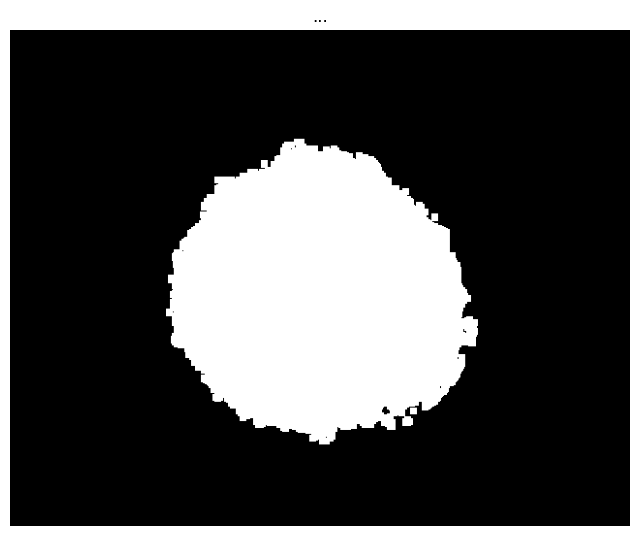

In [48]:
# Apply an erosion + dilation to get rid of small noise:

# Set kernel (structuring element) size:
kernelSize = 3

# Set operation iterations:
opIterations = 3

# Get the structuring element:
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))

# Perform closing:
openingImage = cv2.morphologyEx(binaryImage_reverse, cv2.MORPH_OPEN, maxKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

plt.figure(figsize=(8,8))
plt.imshow(openingImage, cmap='gray', vmin=0, vmax=255)
    
plt.title("...")
plt.axis('off')
plt.show()

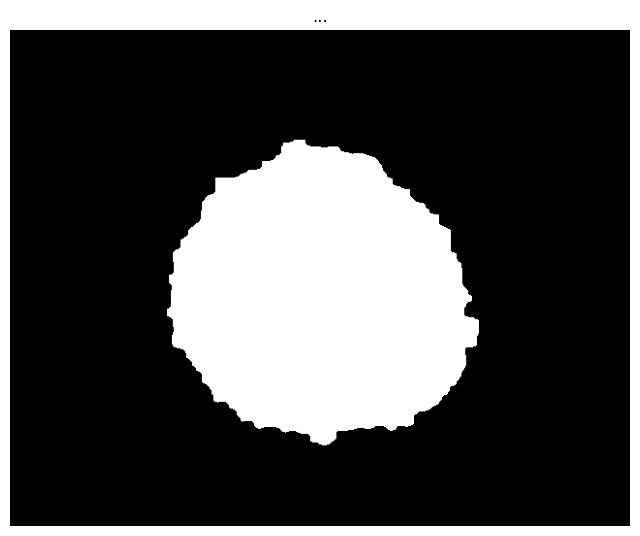

In [56]:
openingImage_filled = cv2.morphologyEx(openingImage, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))

plt.figure(figsize=(8,8))
plt.imshow(openingImage_filled, cmap='gray', vmin=0, vmax=255)
    
plt.title("...")
plt.axis('off')
plt.show()

Cx: 320
Cy: 275


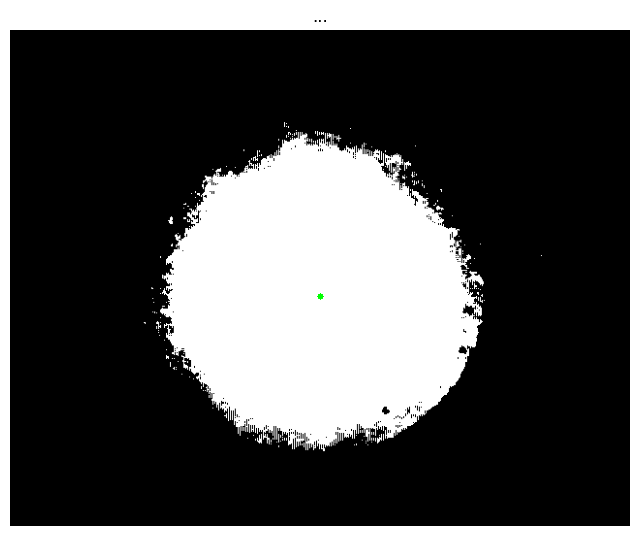

In [57]:
# Calculate the moments of center.
imageMoments = cv2.moments(openingImage_filled)

# Compute centroid
cx = int(imageMoments['m10']/imageMoments['m00'])
cy = int(imageMoments['m01']/imageMoments['m00'])

# Print the point:
print("Cx: "+str(cx))
print("Cy: "+str(cy))

# Draw centroid onto BGR image:
bgrImage = cv2.cvtColor(binaryImage_reverse, cv2.COLOR_GRAY2BGR)
bgrImage = cv2.line(bgrImage, (cx,cy), (cx,cy), (0,255,0), 5)

plt.figure(figsize=(8,8))
plt.imshow(bgrImage, cmap='gray', vmin=0, vmax=255)
    
plt.title("...")
plt.axis('off')
plt.show()